<a href="https://colab.research.google.com/github/uzair011/Advance-python/blob/main/pandas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
%matplotlib inline
# pd.__version__ 1.3.5

# OUTCOMES

* datetime
* agg
* apply
* applymap
* select subsets of the dataframe using boolean selection.
* application of want operator 

In [2]:
# load the data 
url = "https://datascience.quantecon.org/assets/data/state_unemployment.csv"
unemp_raw = pd.read_csv(url, parse_dates= ["Date"])

In [3]:
unemp_raw

,Date,state,LaborForce,UnemploymentRate
0,2000-01-01,Alabama,2142945.0,4.7
1,2000-01-01,Alaska,319059.0,6.3
2,2000-01-01,Arizona,2499980.0,4.1
3,2000-01-01,Arkansas,1264619.0,4.4
4,2000-01-01,California,16680246.0,5.0
...,...,...,...,...
10795,2017-12-01,Virginia,4318483.0,3.6
10796,2017-12-01,Washington,3754871.0,4.7
10797,2017-12-01,West Virginia,781852.0,5.4
10798,2017-12-01,Wisconsin,3158257.0,3.2


In [4]:
unemp_raw.head()

,Date,state,LaborForce,UnemploymentRate
0,2000-01-01,Alabama,2142945.0,4.7
1,2000-01-01,Alaska,319059.0,6.3
2,2000-01-01,Arizona,2499980.0,4.1
3,2000-01-01,Arkansas,1264619.0,4.4
4,2000-01-01,California,16680246.0,5.0


In [6]:
# Re-arranging the database

unemp_all = (
    unemp_raw
    .reset_index()
    .pivot_table(index = "Date", columns = "state", values = "UnemploymentRate")
)
print(unemp_all.head())

state       Alabama  Alaska  Arizona  Arkansas  California  Colorado  \
Date                                                                   
2000-01-01      4.7     6.3      4.1       4.4         5.0       2.8   
2000-02-01      4.7     6.3      4.1       4.3         5.0       2.8   
2000-03-01      4.6     6.3      4.0       4.3         5.0       2.7   
2000-04-01      4.6     6.3      4.0       4.3         5.1       2.7   
2000-05-01      4.5     6.3      4.0       4.2         5.1       2.7   

state       Connecticut  Delaware  Florida  Georgia  ...  South Dakota  \
Date                                                 ...                 
2000-01-01          2.8       3.5      3.7      3.7  ...           2.4   
2000-02-01          2.7       3.6      3.7      3.6  ...           2.4   
2000-03-01          2.6       3.6      3.7      3.6  ...           2.4   
2000-04-01          2.5       3.7      3.7      3.7  ...           2.4   
2000-05-01          2.4       3.7      3.7      3.7

In [7]:
# filtering...

states = ["Alaska", "California", "Florida", "New York", "Washington"]
selected_unemp = unemp_all[states]
print(selected_unemp.head())

state       Alaska  California  Florida  New York  Washington
Date                                                         
2000-01-01     6.3         5.0      3.7       4.7         4.9
2000-02-01     6.3         5.0      3.7       4.7         4.9
2000-03-01     6.3         5.0      3.7       4.6         5.0
2000-04-01     6.3         5.1      3.7       4.6         5.0
2000-05-01     6.3         5.1      3.7       4.6         5.1


<AxesSubplot:xlabel='Date'>

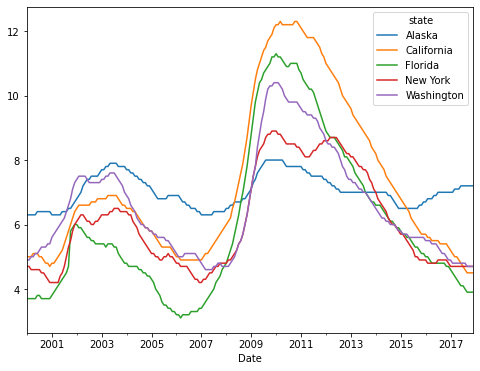

In [7]:
# plotting...

selected_unemp.plot(figsize=(8, 6))

# Dates in pandas

In [8]:
# (YYYY-MM-DD)

selected_unemp.index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='Date', length=216, freq=None)

In [9]:
# DateTimeIndex

selected_unemp.loc["01/01/2001", :]

state
Alaska        6.3
California    4.8
Florida       3.8
New York      4.2
Washington    5.6
Name: 2001-01-01 00:00:00, dtype: float64

In [10]:
selected_unemp.loc["01/01/2001": "01/01/2002", :]

state,Alaska,California,Florida,New York,Washington
Date,,,,,
2001-01-01,6.3,4.8,3.8,4.2,5.6
2001-02-01,6.3,4.8,3.9,4.2,5.7
2001-03-01,6.3,4.9,4.0,4.2,5.8
2001-04-01,6.3,5.0,4.1,4.2,5.9
2001-05-01,6.3,5.1,4.2,4.4,6.0
2001-06-01,6.4,5.2,4.3,4.5,6.1
2001-07-01,6.4,5.4,4.4,4.7,6.2
2001-08-01,6.4,5.6,4.5,5.0,6.4
2001-09-01,6.5,5.8,4.7,5.3,6.6


# DataFrame Aggregations

* Combines multiple values into a single value.
-- BUILT-IN AGGREGATIONS...
1. mean()
2. var()
3. std() - standard deviation
4. min()
5. median()
6. max()



In [12]:
selected_unemp.mean()

state
Alaska        7.037037
California    7.299074
Florida       6.048611
New York      6.102315
Washington    6.585648
dtype: float64

In [11]:
# aggregation's default is to aggeregate each column.
# By, using axis() function we can aggregate by rows...
selected_unemp.mean(axis= 1).head()

Date
2000-01-01    4.92
2000-02-01    4.92
2000-03-01    4.92
2000-04-01    4.94
2000-05-01    4.96
dtype: float64

- Writing our own aggregations... (for flexible analysis)
perforem custom aggregations by following these 2 steps.
 1. write python function that takes a series as an input and output a single value.
 2. call the agg method with our new function as an argument.

In [14]:

## STEP 01: WRITE THE AGGEREGATION METHOD.
# find high or low unemployment.

def high_or_low(s):
  if s.mean() < 6.5:
    output = "LOW"
  else: 
    output = "HIGH"
  return output

## STEP 02: APPLY IT VIA THE agg METHOD.

selected_unemp.agg(high_or_low)

state
Alaska        HIGH
California    HIGH
Florida        LOW
New York       LOW
Washington    HIGH
dtype: object

In [15]:
# accepting multiple values...
selected_unemp.agg([max, high_or_low, min])

state,Alaska,California,Florida,New York,Washington
max,8.0,12.3,11.3,8.9,10.4
high_or_low,HIGH,HIGH,LOW,LOW,HIGH
min,6.3,4.5,3.1,4.2,4.6


# Transforms
- Built-in transforms...
* cum(sum, min, max, prod)
* diff
* +, -, *, /
* pct_change => percentage
* value_counts
* abs => absolute value

In [16]:
selected_unemp.head()

state,Alaska,California,Florida,New York,Washington
Date,,,,,
2000-01-01,6.3,5.0,3.7,4.7,4.9
2000-02-01,6.3,5.0,3.7,4.7,4.9
2000-03-01,6.3,5.0,3.7,4.6,5.0
2000-04-01,6.3,5.1,3.7,4.6,5.0
2000-05-01,6.3,5.1,3.7,4.6,5.1


In [17]:
selected_unemp.pct_change(fill_method = None)

state,Alaska,California,Florida,New York,Washington
Date,,,,,
2000-01-01,NaN,NaN,NaN,NaN,NaN
2000-02-01,0.0,0.000000,0.00000,0.000000,0.000000
2000-03-01,0.0,0.000000,0.00000,-0.021277,0.020408
2000-04-01,0.0,0.020000,0.00000,0.000000,0.000000
2000-05-01,0.0,0.000000,0.00000,0.000000,0.020000
...,...,...,...,...,...
2017-08-01,0.0,-0.021277,-0.02439,0.000000,0.000000
2017-09-01,0.0,-0.021739,-0.02500,0.000000,-0.020833
2017-10-01,0.0,0.000000,0.00000,0.000000,0.000000


In [9]:
selected_unemp.diff().head()

state,Alaska,California,Florida,New York,Washington
Date,,,,,
2000-01-01,NaN,NaN,NaN,NaN,NaN
2000-02-01,0.0,0.0,0.0,0.0,0.0
2000-03-01,0.0,0.0,0.0,-0.1,0.1
2000-04-01,0.0,0.1,0.0,0.0,0.0
2000-05-01,0.0,0.0,0.0,0.0,0.1


Transforms can be split into several main categories...
1. SERIES TRANSFORMS - Functions that take in one series and produce another series. the index of the input and output does need to be the same.
2. SCALAR TRANSFORMS - Functions that take a single value and produce a single value. for an example, abs metnod(absolute value), or adding a constant to each value of a series.

**CUSTOM SERIES TRANSFORMS**

Pandas simplifies appliying constom series transforms to a series or the columns of a dataframe. the steps are,
  1. Write ap python function that takes a series and outputs a new series.
  2. pass our new function as an argument to the apply method.

In [18]:
def standardize_data(x):
  mu = x.mean()
  std = x.std()

  return (x - mu) / std

std_unemployed = selected_unemp.apply(standardize_data)
std_unemployed.head()

state,Alaska,California,Florida,New York,Washington
Date,,,,,
2000-01-01,-1.452433,-0.935545,-0.976846,-0.925962,-1.024983
2000-02-01,-1.452433,-0.935545,-0.976846,-0.925962,-1.024983
2000-03-01,-1.452433,-0.935545,-0.976846,-0.991993,-0.964177
2000-04-01,-1.452433,-0.894853,-0.976846,-0.991993,-0.964177
2000-05-01,-1.452433,-0.894853,-0.976846,-0.991993,-0.903370


In [19]:
abs_std_unemployed = std_unemployed.abs()
abs_std_unemployed.head()

state,Alaska,California,Florida,New York,Washington
Date,,,,,
2000-01-01,1.452433,0.935545,0.976846,0.925962,1.024983
2000-02-01,1.452433,0.935545,0.976846,0.925962,1.024983
2000-03-01,1.452433,0.935545,0.976846,0.991993,0.964177
2000-04-01,1.452433,0.894853,0.976846,0.991993,0.964177
2000-05-01,1.452433,0.894853,0.976846,0.991993,0.903370


In [18]:
# find the date when unemployment was most different from normal for each state

def idxmax(x):
  return x.idxmax() # idmax => will return index of maximal value

abs_std_unemployed.agg(idxmax)


state
Alaska       2009-08-01
California   2010-03-01
Florida      2010-01-01
New York     2009-11-01
Washington   2009-12-01
dtype: datetime64[ns]

CUSTOM SCALAR TRANSFORMS


1. define a python function that takes in a scalar and poduces a scalaar.
2. pass this argument to the applymap series or dataframe method.

# Boolean Selection

Here we use conditions to select the data.

Examples: 
1. Restrict analysis to all individuals older than 18.

2. Look at data that corresponds to particular time periods.

3. Obtain data for a specific product or customer ID.

In [20]:
unemployed_small = selected_unemp.head() # creating a smaller data to see the overall...
print(unemployed_small)

state       Alaska  California  Florida  New York  Washington
Date                                                         
2000-01-01     6.3         5.0      3.7       4.7         4.9
2000-02-01     6.3         5.0      3.7       4.7         4.9
2000-03-01     6.3         5.0      3.7       4.6         5.0
2000-04-01     6.3         5.1      3.7       4.6         5.0
2000-05-01     6.3         5.1      3.7       4.6         5.1


In [21]:
# list of booleans selcts rows...
unemployed_small.loc[[True, True, False, False, True]]

state,Alaska,California,Florida,New York,Washington
Date,,,,,
2000-01-01,6.3,5.0,3.7,4.7,4.9
2000-02-01,6.3,5.0,3.7,4.7,4.9
2000-05-01,6.3,5.1,3.7,4.6,5.1


In [25]:
# second argument selects the columns, : selects all

unemployed_small.loc[[True, True, True, False, False], :]

state,Alaska,California,Florida,New York,Washington
Date,,,,,
2000-01-01,6.3,5.0,3.7,4.7,4.9
2000-02-01,6.3,5.0,3.7,4.7,4.9
2000-03-01,6.3,5.0,3.7,4.6,5.0


In [26]:
# using booleans to select both columns and rows

unemployed_small.loc[[True, True, False, False, False], [True, False, False, True, True]]

state,Alaska,New York,Washington
Date,,,
2000-01-01,6.3,4.7,4.9
2000-02-01,6.3,4.7,4.9


**CREATING BOOLEAN DATAFRAMS/ SERIES**

- Use conditional statements to construct series of booleans from our data.

In [32]:
unemployed_small["New York"] > 4.7

Date
2000-01-01    False
2000-02-01    False
2000-03-01    False
2000-04-01    False
2000-05-01    False
Name: New York, dtype: bool

In [41]:
# extract subsets of rows from daraframe, after getting series of bools...

is_Big_ny = unemployed_small["New York"] < unemployed_small["California"]
unemployed_small.loc[is_Big_ny]

state,Alaska,California,Florida,New York,Washington
Date,,,,,
2000-01-01,6.3,5.0,3.7,4.7,4.9
2000-02-01,6.3,5.0,3.7,4.7,4.9
2000-03-01,6.3,5.0,3.7,4.6,5.0
2000-04-01,6.3,5.1,3.7,4.6,5.0
2000-05-01,6.3,5.1,3.7,4.6,5.1


**MULTIPLE CONDITIONS**

- and => &
- or => |
- 
- isin
- any, all
- 

In [45]:
unEm_NY_or_CAL = (unemployed_small["New York"] < 4.7) & ( unemployed_small["California"] > 5 ) 
print(unEm_NY_or_CAL)

Date
2000-01-01    False
2000-02-01    False
2000-03-01    False
2000-04-01     True
2000-05-01     True
dtype: bool


In [46]:
unemployed_small[unEm_NY_or_CAL]

state,Alaska,California,Florida,New York,Washington
Date,,,,,
2000-04-01,6.3,5.1,3.7,4.6,5.0
2000-05-01,6.3,5.1,3.7,4.6,5.1


In [52]:
# isin
# we use this to check whether a data point takes on one of a several fixed values.

# or ==>  (df["x"] == val_1) | (df["x"] == val_2) 

print(unemployed_small['Alaska'].isin([4.8, 6.3]),"\n")
print(unemployed_small['Alaska'].isin([4.8, 6.4]))

Date
2000-01-01    True
2000-02-01    True
2000-03-01    True
2000-04-01    True
2000-05-01    True
Name: Alaska, dtype: bool 

Date
2000-01-01    False
2000-02-01    False
2000-03-01    False
2000-04-01    False
2000-05-01    False
Name: Alaska, dtype: bool


In [57]:
isin_fullrows = unemployed_small['California'].isin([5.1, 6.3])
unemployed_small.loc[isin_fullrows]

state,Alaska,California,Florida,New York,Washington
Date,,,,,
2000-04-01,6.3,5.1,3.7,4.6,5.0
2000-05-01,6.3,5.1,3.7,4.6,5.1


In [67]:
# .any and .all

# .any turns True whenever atleast one of the inputs are True
# .all turns True only when all the inputs are True

# starts with want operator, 

high = unemp_all > 6.5
high.head()

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2000-02-01,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2000-03-01,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2000-04-01,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2000-05-01,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [68]:
# use the .all method...

all_high = high.all(axis= 1)
print(all_high)

Date
2000-01-01    False
2000-02-01    False
2000-03-01    False
2000-04-01    False
2000-05-01    False
              ...  
2017-08-01    False
2017-09-01    False
2017-10-01    False
2017-11-01    False
2017-12-01    False
Length: 216, dtype: bool


In [69]:
message = "Out of {} months, {} had high unemployment rate across all states..."
print(message.format(len(all_high), all_high.sum()))

Out of 216 months, 0 had high unemployment rate across all states...
